<a href="https://colab.research.google.com/github/hydro-7/CNN/blob/main/NN_Intro3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# **Making dataset with linear regression**

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10],

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# **Create a train & test split**

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train, = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

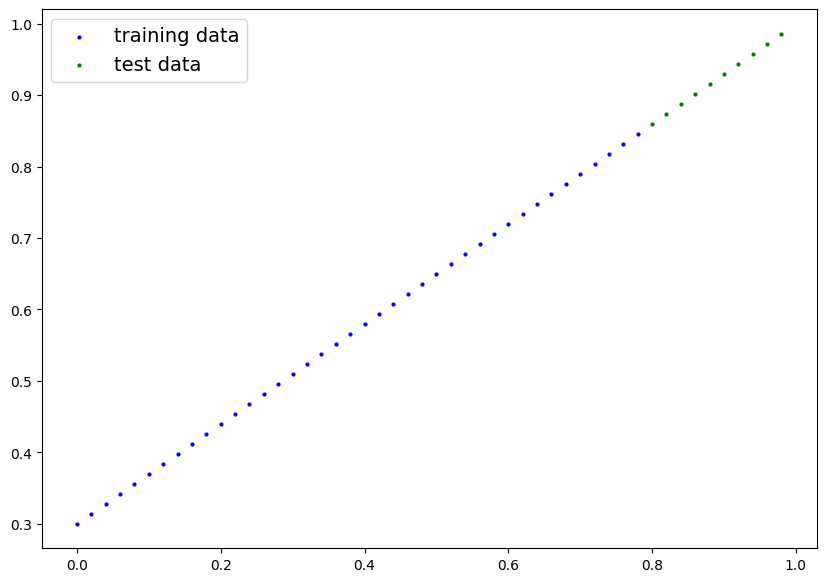

In [4]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  plots tarining data, test data and compare predictions
  """
  plt.figure(figsize = (10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c = "g", s=4, label = "test data")

  # Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s = 4, label = "predictions")

  #show the legend
  plt.legend(prop = {"size": 14})

plot_predictions()

# **Building model**

In [5]:
class LenearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad = True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype = torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

# grad -> torch.autograd implements grad descent to get next values of the parameters (i.e, weights & bias)

In [6]:
torch.manual_seed(42)

model_0 = LenearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

# **Making predictions with the randomized initial values :**

In [7]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

# y_preds = model_0(X_test)
# y_preds
# we use torch inderence mode to turn off gradient tracking, the normal code (code above has the gradient tracking enabled)

# with torch.no_grad():
#   y_preds = model_0(X_test)

# y_preds

# the functionality of no_grad & inference mode is the same, inf mode is a bit faster

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

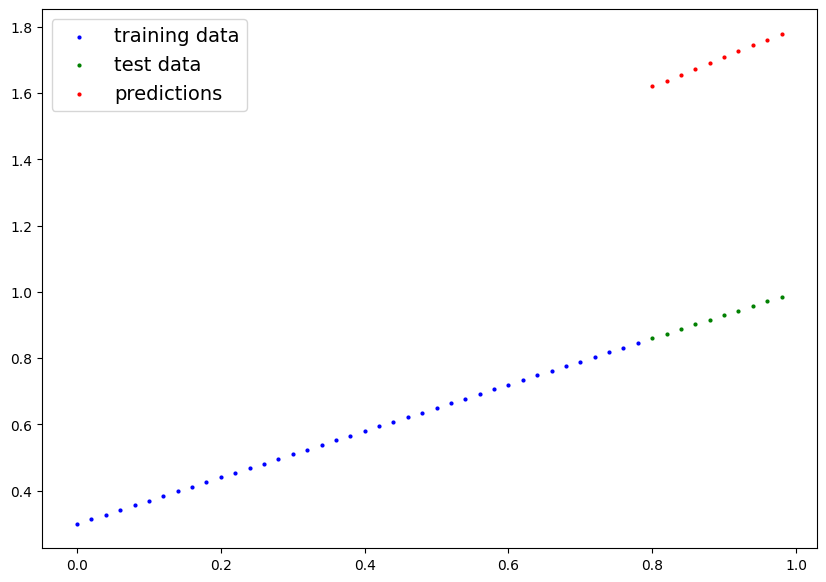

In [8]:
plot_predictions(predictions=y_preds)

# **Training the Model**

In [9]:
loss_fn =  nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) #lr = learning rate = possibly the important hyperparameter you can set.

In [10]:
torch.manual_seed(42)
epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []

  ### Train
for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

print(model_0.state_dict())

Loss: 0.6860889196395874
Epoch: 0 | Loss: 0.6860889196395874 | Test loss: 0.7637526988983154
Loss: 0.6745679974555969
Loss: 0.6630470156669617
Loss: 0.6515260338783264
Loss: 0.6400049924850464
Loss: 0.6284840703010559
Loss: 0.6169630289077759
Loss: 0.6054420471191406
Loss: 0.5939210653305054
Loss: 0.5824000239372253
Loss: 0.5708791017532349
Epoch: 10 | Loss: 0.5708791017532349 | Test loss: 0.6290428042411804
Loss: 0.5593580603599548
Loss: 0.5478371381759644
Loss: 0.5363161563873291
Loss: 0.5247951149940491
Loss: 0.5132741332054138
Loss: 0.5017532110214233
Loss: 0.4902321696281433
Loss: 0.47871121764183044
Loss: 0.4671902060508728
Loss: 0.45566922426223755
Epoch: 20 | Loss: 0.45566922426223755 | Test loss: 0.4943329691886902
Loss: 0.4441482126712799
Loss: 0.43262726068496704
Loss: 0.4211062490940094
Loss: 0.40958523750305176
Loss: 0.3980643153190613
Loss: 0.38654330372810364
Loss: 0.375022292137146
Loss: 0.36350134015083313
Loss: 0.3519803285598755
Loss: 0.34045934677124023
Epoch: 30 | 

# **Plot Results**

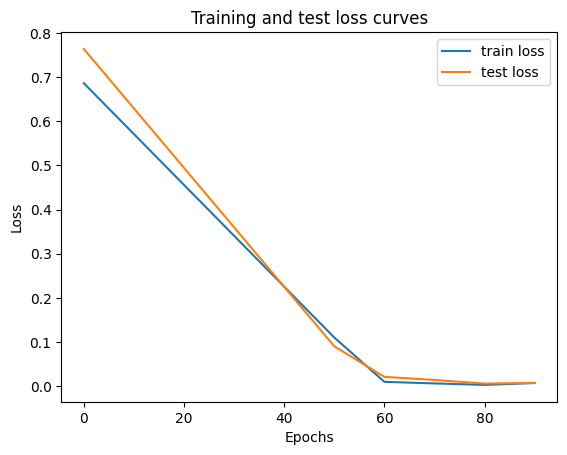

In [11]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

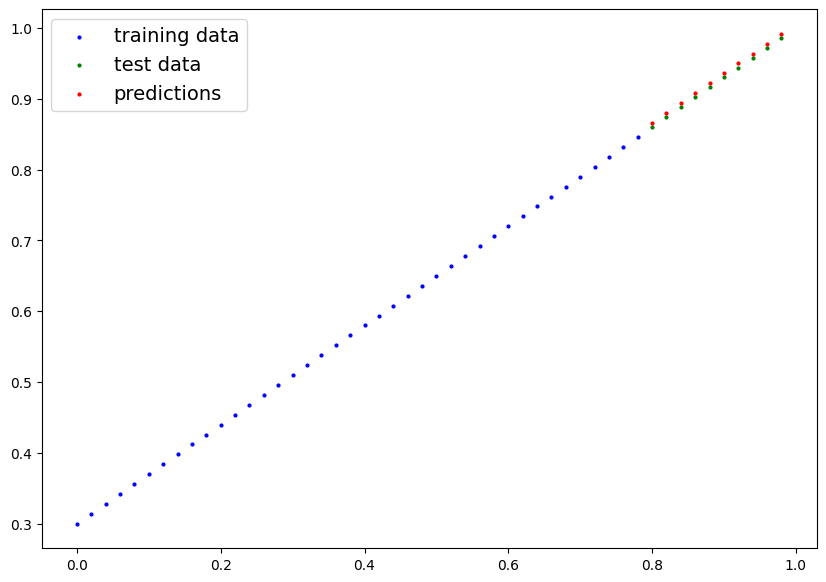

In [12]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)
plot_predictions(predictions = y_pred_new)

# **Saving the model**

In [13]:
# Saving our PyTorch model
from pathlib import Path
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# print(MODEL_SAVE_PATH)

# 3. Save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH} ")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_0.pth 


# **Loading the saved model**

In [14]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LenearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>